IMPORT LIBRARIES

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '/kaggle/input/iris-flower-dataset/IRIS.csv' 

data = pd.read_csv(file_path)

READ DATA

In [3]:
data.shape


(150, 5)

In [4]:
data.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.duplicated().sum()

3

REMOVE DUPLICATE VALUES

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

CHECK NULL VALUE

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

UNIQUE VALUES IN EACH COLUMN

In [11]:
for column in data.columns:

    print(f'{column}: {data[column].nunique()}')

sepal_length: 35
sepal_width: 23
petal_length: 43
petal_width: 22
species: 3


In [12]:
data['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

DISTRIBUTION OF SPECIES 

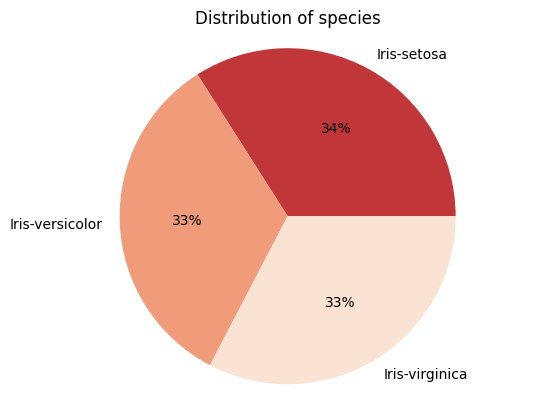

In [13]:
color = sns.color_palette('RdBu')

plt.pie(data['species'].value_counts(), labels=data['species'].unique(), autopct='%1.f%%',colors=color)

plt.title('Distribution of species')

plt.axis('equal')

plt.show()

In [14]:
le =LabelEncoder()

data['species'] = le.fit_transform(data['species'])

print(le.classes_) 

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [15]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
74,6.4,2.9,4.3,1.3,1
42,4.4,3.2,1.3,0.2,0
20,5.4,3.4,1.7,0.2,0
69,5.6,2.5,3.9,1.1,1
33,5.5,4.2,1.4,0.2,0
75,6.6,3.0,4.4,1.4,1
136,6.3,3.4,5.6,2.4,2
123,6.3,2.7,4.9,1.8,2
85,6.0,3.4,4.5,1.6,1
121,5.6,2.8,4.9,2.0,2


CORRELATION MATRIX

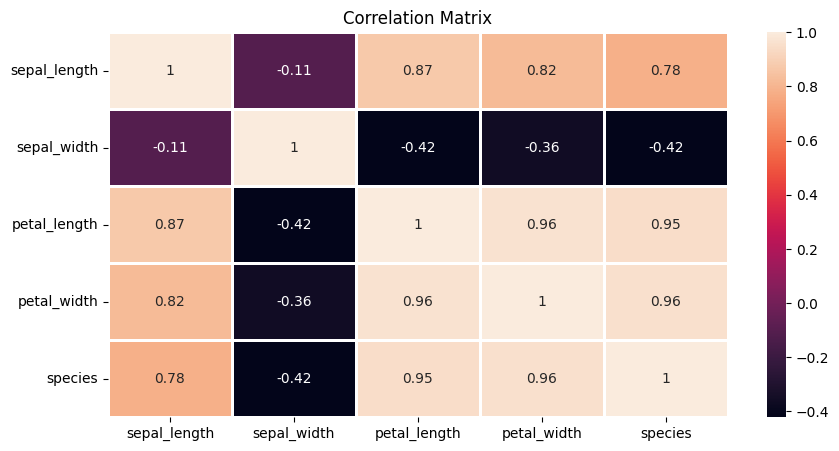

In [16]:
plt.figure(figsize=(10,5))

sns.heatmap(data.corr(), annot=True,linewidths=2)

plt.title('Correlation Matrix')

plt.show()

SPLIT THE DATA

In [17]:
data_x = data.drop('species', axis=1)

data_y = data['species']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(data_x, data_y, test_size=0.1, random_state=42)

In [19]:
def Regression_model(model):

    model.fit(xtrain, ytrain)

    train_daTa_accuracy = model.score(xtrain, ytrain) #train daTa

    test_daTa_accuracy = model.score(xtest, ytest) #test daTa

    print('model name : ',model)

    print('accuracy of train data = ',train_daTa_accuracy)

    print('accuracy of test data = ',test_daTa_accuracy)

In [20]:
model = RandomForestRegressor()
Regression_model(model)

model name :  RandomForestRegressor()
accuracy of train data =  0.9954352346947661
accuracy of test data =  0.84138


In [21]:
model = DecisionTreeClassifier()
Regression_model(model)

model name :  DecisionTreeClassifier()
accuracy of train data =  1.0
accuracy of test data =  0.8


CONCLUSION